#Q2 Scene Recognition using Bag of Visual Words (BOVW)


##Library

In [1]:
# from scipy import ndimg
import matplotlib.pyplot as plt
# from scipy.spatial import distance
from sklearn.cluster import KMeans
import numpy as np
import cv2 
import math
import os
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

##Preprocess Data

In [2]:
def load_images_from_folder(folder):
    images = []
    classes = []
    classnames = []
    tag = 0
    for category_folder in os.listdir(folder):
      if category_folder[0] != '.':
        classnames.append(category_folder)
        for filename in os.listdir(folder + '/' + category_folder):
          if filename[0] != '.':
            img = cv2.imread(folder + '/' + category_folder + '/' + filename)
            images.append(img)
            classes.append(tag)
        tag += 1
    return [images, classes]

classnames = []
for category_folder in os.listdir('/content/drive/MyDrive/Sem 4/CV/Assignment_4/dataset/SUN_data/train'):
  if category_folder[0] != '.':
    classnames.append(category_folder)

train_images, train_classes = load_images_from_folder('/content/drive/MyDrive/Sem 4/CV/Assignment_4/dataset/SUN_data/train') 
test_images, test_classes = load_images_from_folder('/content/drive/MyDrive/Sem 4/CV/Assignment_4/dataset/SUN_data/test') 

#Create Visual Words

In [3]:
def createVisualWords(images, vocab_size):
  sift = cv2.xfeatures2d.SIFT_create(200)
  features = []
  for img in images:
    kp, des = sift.detectAndCompute(img,None)
    features.extend(des)
  kmeans = KMeans(n_clusters = vocab_size)
  kmeans.fit(features)
  visual_words = kmeans.cluster_centers_ 
  return visual_words


visual_words = createVisualWords(train_images,100)

           


#Create Histogram of Visual Words

In [ ]:
 def findNearestVisualWord(feature, visual_words):
  index = 0
  mindist = math.inf 
  for i in range(visual_words.shape[0]):
    dist = np.sum(np.square(visual_words[i] - feature))
    if dist < mindist:
      mindist = dist
      index = i
  return index

def findHistogramOfVisualWords(images, visual_words):
  train_data = []
  sift = cv2.xfeatures2d.SIFT_create(200)
  i = 0
  for img in images:
    print(i)
    i += 1
    histogram = np.zeros(visual_words.shape[0])
    kp, descriptors = sift.detectAndCompute(img,None)
    for des in descriptors:
      ind = findNearestVisualWord(np.array(des.copy()), np.array(visual_words.copy()))
      histogram[ind] += 1
    train_data.append(histogram)
  return train_data

train_data = findHistogramOfVisualWords(train_images, visual_words)
test_data = findHistogramOfVisualWords(test_images, visual_words)

#Normalization

In [5]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(train_data)
train_data = stdslr.transform(train_data)
test_data = stdslr.transform(test_data)


#Report

####Vocab size = 100 

| Regulization Parameter C | Normalization Accuracy | Without  Normalization Accuracy|
| --- | ----------- | --- |
| 0.01 | 0.4937 | 0.45625 |
| 0.05 | 0.475 | 0.4375 |
| 0.10 | 0.4562 | 0.4312 |
| 0.25 | 0.45625 | 0.4 |
| 0.50 | 0.4312 | 0.4 |




#Confussion Matrix With Normalized Histogram

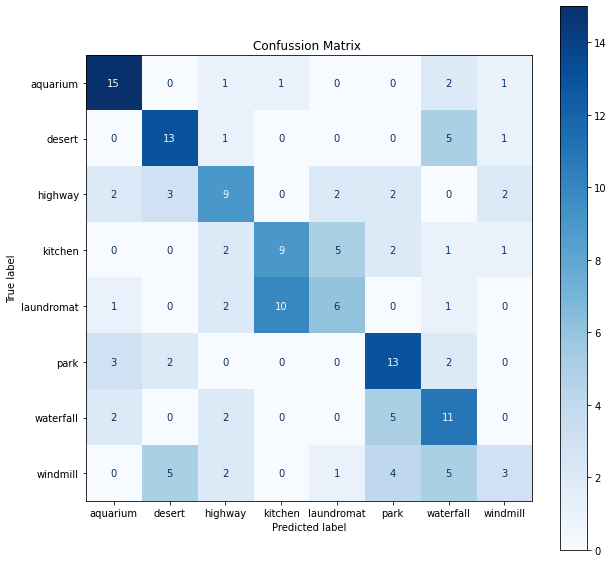

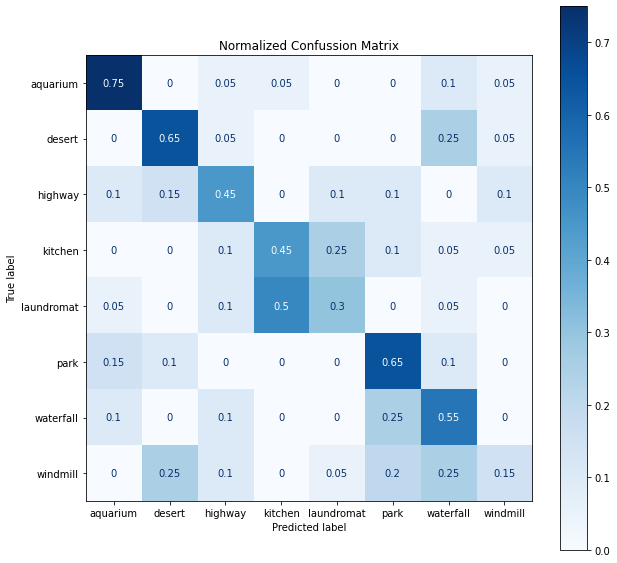

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf, test_data, test_classes,
                                 display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=ax)
disp.ax_.set_title('Confussion Matrix ')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf, test_data, test_classes,
                                 display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize='true', ax=ax)
disp.ax_.set_title('Normalized Confussion Matrix')
plt.show()

#Confussion Matrix Without Normalizing Histogram

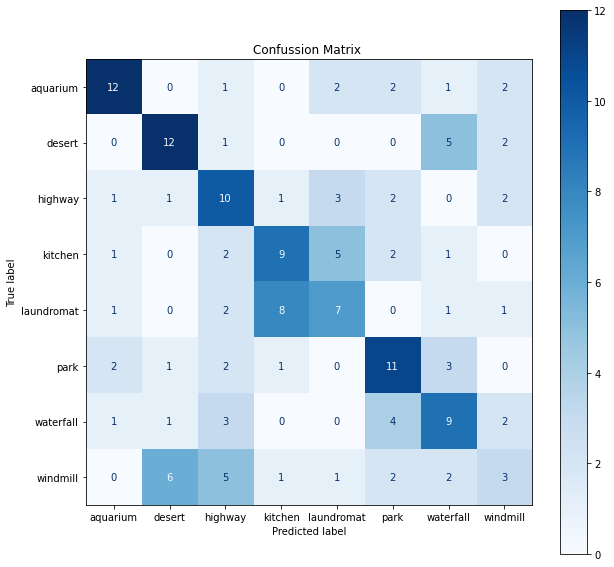

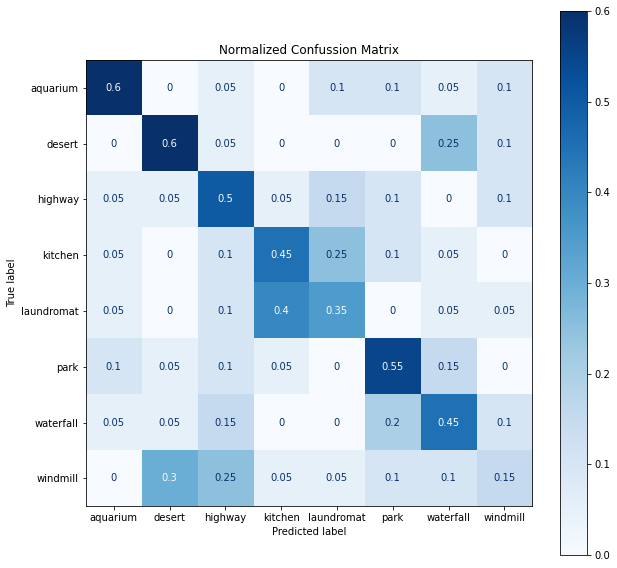

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf, test_data, test_classes,
                                 display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=ax)
disp.ax_.set_title('Confussion Matrix ')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf, test_data, test_classes,
                                 display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize='true', ax=ax)
disp.ax_.set_title('Normalized Confussion Matrix')
plt.show()

#Correctly Classified Images and Mis - Classified Images

In [7]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000, C = 0.005 )
clf.fit(train_data,np.array(train_classes))
clf.score(test_data,np.array(test_classes))

0.51875

Correct label : 0


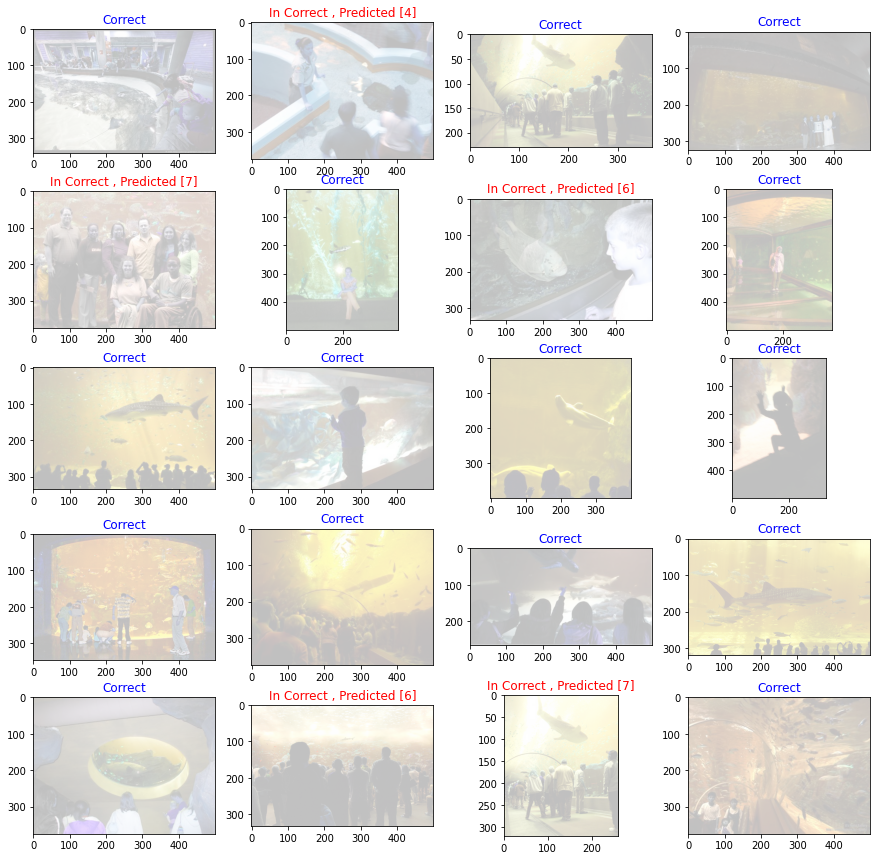

In [19]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

print('Correct label : 0')
for i in range(columns*rows):
    ypred = clf.predict([test_data[i]])
    # print(ypred, test_classes[i])
    img = test_images[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    if ypred == test_classes[i]:
      ax[-1].set_title("Correct",color='b')  # set title
    else:
      ax[-1].set_title("In Correct , Predicted " + str(ypred),color='r')  # set title
    plt.imshow(img, alpha=0.25)

